# EDA

In [1]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from collections import Counter

In [2]:
# importing all cleaned text

comments_df = pd.read_pickle("data/comments_tokenize.pkl")

In [3]:
comments_df.head()

,video_id,comment,comment_date,binary,tokenize
0,xJlgtV8L7Jc,For more on this: https://sc.mp/gjys,2023-07-26 04:11:40+00:00,1,"[for, more, on, this, url]"
1,xJlgtV8L7Jc,"Yes, punish the criminals , not the innocent ...",2023-08-03 03:52:04+00:00,0,"[yes, punish, the, innocent, people]"
2,xJlgtV8L7Jc,Flor Contemplacion had been there. Filipinos k...,2023-08-02 15:10:36+00:00,1,"[flor, contemplacion, had, been, made, out, of..."
3,xJlgtV8L7Jc,Don't mind these westoids. I'm half Indonesian...,2023-08-01 08:46:42+00:00,1,"[dont, mind, these, westoids, im, half, indone..."
4,xJlgtV8L7Jc,No wonder Singapore has the most powerful pass...,2023-08-01 07:57:54+00:00,1,"[no, wonder, singapore, has, the, most, powerf..."


### Stopwords analysis

In [4]:
stop_words = set(stopwords.words('english'))

In [5]:
# count common stopwords in corpus

stopword_frequency = Counter()

for list in comments_df['tokenize']:
    for token in list:
        if token in stop_words:
            stopword_frequency[token] += 1

In [6]:
stopword_data = ({'stop_words': dict(stopword_frequency).keys(), 'frequency': dict(stopword_frequency).values()})

In [7]:
stopword_df = pd.DataFrame(stopword_data)

In [8]:
stopword_df.sort_values(by = 'frequency', ascending=False, inplace=True)
top20_stopwords = stopword_df[:20]

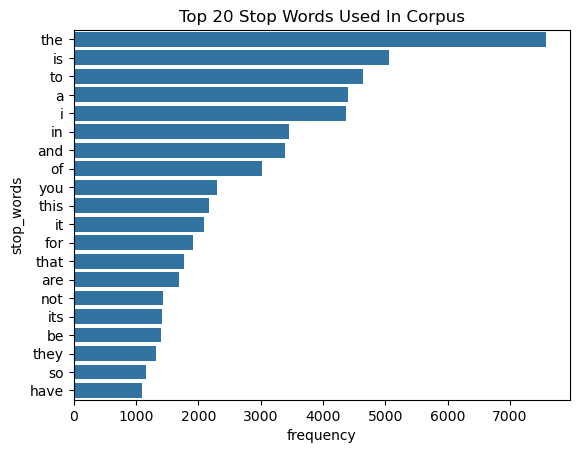

In [9]:
sns.barplot(top20_stopwords, x = 'frequency', y = 'stop_words', color='tab:blue').set(title = 'Top 20 Stop Words Used In Corpus');

Since the stopwords do not carry any significant meaning in this context, we will drop the stopwords from the corpus in order to reduce noise.

In [10]:
# remove stopwords

def remove_stopwords(lists):
    return [word for word in lists if word not in stop_words]

In [11]:
comments_df['tokenize'] = comments_df['tokenize'].apply(remove_stopwords)

### Word frequency analysis

In [12]:
# word frequency

all_tokenized_text = [word for sublist in comments_df['tokenize'] for word in sublist]
word_counts = Counter(all_tokenized_text)
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

In [13]:
word_freq_df.shape

(15811, 2)

In [14]:
# top 20 words

top20_freq = word_freq_df[:20]

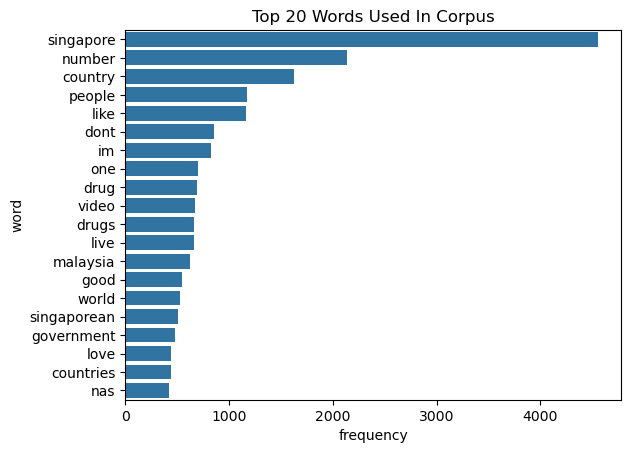

In [15]:
sns.barplot(top20_freq, x = 'frequency', y = 'word', color='tab:blue').set(title = 'Top 20 Words Used In Corpus');

In [16]:
# bottom 20 words

least20_freq = word_freq_df[-20:]

In [17]:
least20_freq

,word,frequency
8619,bacon,1
8596,criticisms,1
8595,distinguish,1
8593,endians,1
8571,respects,1
8561,westerns,1
8562,liberate,1
8564,haging,1
8566,bab,1
8568,contented,1


In [18]:
word_freq_df[(word_freq_df['frequency'] < 2)].count()

word         8721
frequency    8721
dtype: int64

**Most frequent words**

'Singapore' and 'singaporean' appears in the top 20 most frequently used words. Since the videos/comments are about Singapore, we will remove these domain-specific stopwords from the corpus.

In addition, 'number' was created to replace the numeric inputs in the corpus. As such, they will not be significant in the analysis of the corpus, and should be removed.

Words like 'im' were missed out in the removal of stopwords as punctuation has been removed. It would not be significant in the analysis of the corpus. We will be removing these words too. 

**Least frequent words**

The least frequent words seem to have more relevance for sentiment analysis. Words with only one frequency make up more than half of the data and to remove them would significantly reduce the size of the corpus. As such, we will leave the least frequent words in the corpus for analysis.

In [19]:
# remove most freq words

remove_most_freq = ['singapore', 'singaporean', 'number', 'im']

def remove_freq(lists):
    return [word for word in lists if word not in remove_most_freq]

In [20]:
comments_df['tokenize'] = comments_df['tokenize'].apply(remove_freq)

### n-grams analysis

In [21]:
def get_ngrams(tokens, n):
    ngrams = [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]
    return ngrams

In [22]:
# bigrams

n=2
comments_df['bigrams'] = comments_df['tokenize'].apply(lambda tokens: get_ngrams(tokens, n))

In [23]:
bigrams_frequency = Counter()

for list in comments_df['bigrams']:
    for token in list:
        bigrams_frequency[token] += 1

In [24]:
bigrams_data = pd.DataFrame({'bigrams': dict(bigrams_frequency).keys(), 'frequency': dict(bigrams_frequency).values()})

In [25]:
bigrams_data.sort_values(by = 'frequency', ascending=False, inplace=True)
top20_bigrams = bigrams_data[:20]

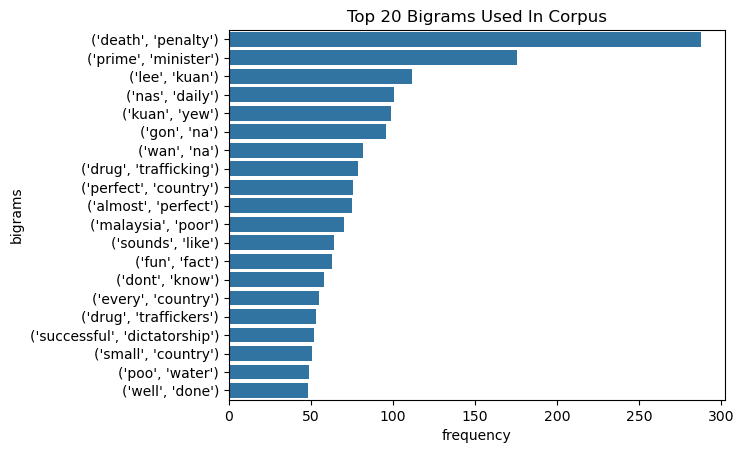

In [26]:
sns.barplot(top20_bigrams, x = 'frequency', y = 'bigrams', color='tab:blue').set(title = 'Top 20 Bigrams Used In Corpus');

In [27]:
# trigrams

n=3
comments_df['trigrams'] = comments_df['tokenize'].apply(lambda tokens: get_ngrams(tokens, n))

In [28]:
trigrams_frequency = Counter()

for list in comments_df['trigrams']:
    for token in list:
        trigrams_frequency[token] += 1

In [29]:
trigrams_data = pd.DataFrame({'trigrams': dict(trigrams_frequency).keys(), 'frequency': dict(trigrams_frequency).values()})

In [30]:
trigrams_data.sort_values(by = 'frequency', ascending=False, inplace=True)
top20_trigrams = trigrams_data[:20]

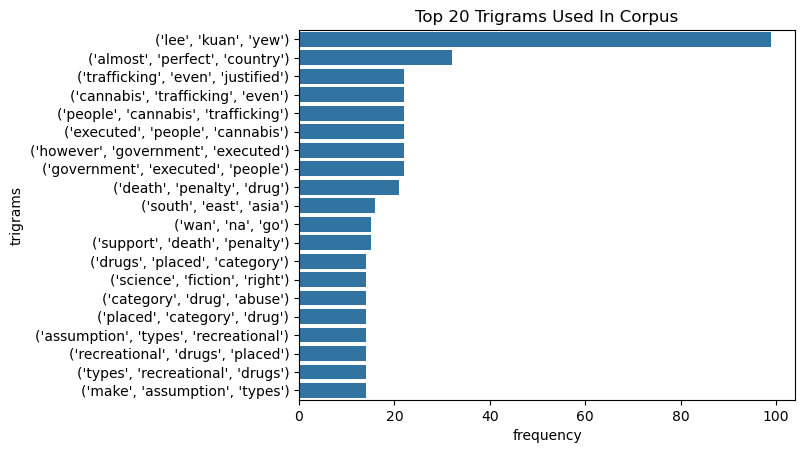

In [31]:
sns.barplot(top20_trigrams, x = 'frequency', y = 'trigrams', color='tab:blue').set(title = 'Top 20 Trigrams Used In Corpus');

The bigrams and trigrams analyses surfaced interesting phrases that have very strong contextual meaning to the corpus. We will include this as a parameter when running the machine learning models. 

### Sentiment analysis

In [32]:
# check for imbalances

comments_df['binary'].value_counts()

1    16059
0     6105
Name: binary, dtype: int64

Since there is an imbalance of data classes, we will have to correct this through SMOTE, etc.

In [33]:
comments_df

,video_id,comment,comment_date,binary,tokenize,bigrams,trigrams
0,xJlgtV8L7Jc,For more on this: https://sc.mp/gjys,2023-07-26 04:11:40+00:00,1,[url],[],[]
1,xJlgtV8L7Jc,"Yes, punish the criminals , not the innocent ...",2023-08-03 03:52:04+00:00,0,"[yes, punish, innocent, people]","[(yes, punish), (punish, innocent), (innocent,...","[(yes, punish, innocent), (punish, innocent, p..."
2,xJlgtV8L7Jc,Flor Contemplacion had been there. Filipinos k...,2023-08-02 15:10:36+00:00,1,"[flor, contemplacion, made, experience]","[(flor, contemplacion), (contemplacion, made),...","[(flor, contemplacion, made), (contemplacion, ..."
3,xJlgtV8L7Jc,Don't mind these westoids. I'm half Indonesian...,2023-08-01 08:46:42+00:00,1,"[dont, mind, westoids, half, indonesianmalaysi...","[(dont, mind), (mind, westoids), (westoids, ha...","[(dont, mind, westoids), (mind, westoids, half..."
4,xJlgtV8L7Jc,No wonder Singapore has the most powerful pass...,2023-08-01 07:57:54+00:00,1,"[wonder, powerful, passport, toppling, japan, ...","[(wonder, powerful), (powerful, passport), (pa...","[(wonder, powerful, passport), (powerful, pass..."
...,...,...,...,...,...,...,...
22159,xi6r3hZe5Tg,+1 science is difficult,2018-11-24 13:06:36+00:00,0,"[science, difficult]","[(science, difficult)]",[]
22160,xi6r3hZe5Tg,I live in Australia and have always wanted to ...,2018-11-24 13:03:39+00:00,1,"[live, australia, always, wanted, visit]","[(live, australia), (australia, always), (alwa...","[(live, australia, always), (australia, always..."
22161,xi6r3hZe5Tg,yeah! second here ❤,2018-11-24 13:03:13+00:00,1,"[yeah, second]","[(yeah, second)]",[]
22162,xi6r3hZe5Tg,Awesome... civilization is getting to it's pea...,2018-11-24 13:02:55+00:00,1,"[awesome, civilization, getting, peak]","[(awesome, civilization), (civilization, getti...","[(awesome, civilization, getting), (civilizati..."


In [34]:
comments_df.to_pickle('data/comments_final.pkl')